In [1]:
# -------------------------------------------------------------------------------------------------
# ATM 240 Python
# Robert Fovell rfovell@albany.edu
# 
# Plotting GFS data in GRIB2 format - GFS_plot_exercise.ipynb
#
# Other resources: Your cartopy.ipynb, RADAR.ipynb, HELLHOLE.ipynb, and COVID.ipynb scripts
# -------------------------------------------------------------------------------------------------

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pyproj import Proj
import matplotlib.cm as cm
import datetime

import os, sys
import xarray as xr

# metpy
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.interpolate import cross_section
import metpy.plots as mpplots

# cartopy
import cartopy.crs as ccrs # cartopy coordinate reference system
import cartopy.feature as cfeat # features like color-shading for land, ocean, coastlines, state boundaries

print(" and away we go...")

 and away we go...


In [2]:
# function for adding common cartopy features to plot

def features(ax):
    # Add coastlines and states, etc.
    ax.add_feature(cfeat.COASTLINE.with_scale('50m'), linewidth=2)
    ax.add_feature(cfeat.STATES.with_scale('50m'),linestyle='dotted')
    ax.add_feature(cfeat.LAKES,alpha=0.5) # alpha sets transparency level
    ax.add_feature(cfeat.RIVERS)
    ax.add_feature(cfeat.OCEAN.with_scale('50m'))
    ax.add_feature(cfeat.LAND.with_scale('50m'))
    ax.gridlines()
    
    return ax

print(" ready to proceed ")

 ready to proceed 


In [3]:
# fetch GFS data for 2020110700 forecast hour 24 in GRIB2 format
# this uses xarray and the pynio engine to read GRIB2 data

ds = xr.open_dataset('/spare11/atm240/gfs.t00z.pgrb2.0p25.f024',engine='pynio')

print(" ..got dataset.. ")

 ..got dataset.. 


In [4]:
# let's see what's inside our dataset

# Click on the 'Data variables' arrow to expose the variables
# Click on the paper icon at right to reveal info about the variable
# Click on the double-decker Oreo at right to reveal either coordinates or data type

ds

<xarray.Dataset>
Dimensions:                   (lat_0: 721, lon_0: 1440, lv_AMSL1: 3, lv_DBLL14: 4, lv_HTGL2: 3, lv_HTGL4: 2, lv_HTGL8: 7, lv_ISBL0: 34, lv_ISBL10: 29, lv_ISBL12: 24, lv_ISBL13: 19, lv_ISBL5: 31, lv_ISBL7: 22, lv_ISBL9: 21, lv_PVL3: 2, lv_SIGL6: 4, lv_SPDL11: 2)
Coordinates:
  * lv_ISBL13                 (lv_ISBL13) float32 10000.0 15000.0 ... 100000.0
  * lv_ISBL12                 (lv_ISBL12) float32 40.0 100.0 ... 100000.0
  * lv_ISBL10                 (lv_ISBL10) float32 40.0 1000.0 ... 100000.0
  * lv_ISBL9                  (lv_ISBL9) float32 10000.0 15000.0 ... 100000.0
  * lv_HTGL8                  (lv_HTGL8) float32 10.0 20.0 30.0 ... 80.0 100.0
  * lv_ISBL7                  (lv_ISBL7) float32 5000.0 10000.0 ... 100000.0
  * lv_ISBL5                  (lv_ISBL5) float32 100.0 200.0 ... 100000.0
  * lv_HTGL4                  (lv_HTGL4) float32 2.0 80.0
  * lv_PVL3                   (lv_PVL3) float32 -2e-06 2e-06
  * lv_HTGL2                  (lv_HTGL2) float32 2.0 80.0 100.0
  * lv_AMSL1                  (lv_AMSL1) float32 1829.0 2743.0 3658.0
  * lv_ISBL0                  (lv_ISBL0) float32 40.0 100.0 ... 97500.0 100000.0
  * lat_0                     (lat_0) float32 90.0 89.75 89.5 ... -89.75 -90.0
  * lon_0                     (lon_0) float32 0.0 0.25 0.5 ... 359.5 359.75
Dimensions without coordinates: lv_DBLL14, lv_SIGL6, lv_SPDL11
Data variables:
    TMP_P0_L1_GLL0            (lat_0, lon_0) float32 ...
    TMP_P0_L6_GLL0            (lat_0, lon_0) float32 ...
    TMP_P0_L7_GLL0            (lat_0, lon_0) float32 ...
    TMP_P0_L100_GLL0          (lv_ISBL0, lat_0, lon_0) float32 ...
    TMP_P0_L102_GLL0          (lv_AMSL1, lat_0, lon_0) float32 ...
    TMP_P0_L103_GLL0          (lv_HTGL2, lat_0, lon_0) float32 ...
    TMP_P0_L104_GLL0          (lat_0, lon_0) float32 ...
    TMP_P0_2L108_GLL0         (lat_0, lon_0) float32 ...
    TMP_P0_L109_GLL0          (lv_PVL3, lat_0, lon_0) float32 ...
    POT_P0_L104_GLL0          (lat_0, lon_0) float32 ...
    DPT_P0_L103_GLL0          (lat_0, lon_0) float32 ...
    APTMP_P0_L103_GLL0        (lat_0, lon_0) float32 ...
    SPFH_P0_L103_GLL0         (lv_HTGL4, lat_0, lon_0) float32 ...
    SPFH_P0_2L108_GLL0        (lat_0, lon_0) float32 ...
    RH_P0_L4_GLL0             (lat_0, lon_0) float32 ...
    RH_P0_L100_GLL0           (lv_ISBL5, lat_0, lon_0) float32 ...
    RH_P0_L103_GLL0           (lat_0, lon_0) float32 ...
    RH_P0_2L104_GLL0          (lv_SIGL6, lat_0, lon_0) float32 ...
    RH_P0_L104_GLL0           (lat_0, lon_0) float32 ...
    RH_P0_2L108_GLL0          (lat_0, lon_0) float32 ...
    RH_P0_L200_GLL0           (lat_0, lon_0) float32 ...
    RH_P0_L204_GLL0           (lat_0, lon_0) float32 ...
    PWAT_P0_L200_GLL0         (lat_0, lon_0) float32 ...
    PRATE_P0_L1_GLL0          (lat_0, lon_0) float32 ...
    SNOD_P0_L1_GLL0           (lat_0, lon_0) float32 ...
    WEASD_P0_L1_GLL0          (lat_0, lon_0) float32 ...
    CLWMR_P0_L100_GLL0        (lv_ISBL7, lat_0, lon_0) float32 ...
    CLWMR_P0_L105_GLL0        (lat_0, lon_0) float32 ...
    ICMR_P0_L100_GLL0         (lv_ISBL7, lat_0, lon_0) float32 ...
    ICMR_P0_L105_GLL0         (lat_0, lon_0) float32 ...
    RWMR_P0_L100_GLL0         (lv_ISBL7, lat_0, lon_0) float32 ...
    RWMR_P0_L105_GLL0         (lat_0, lon_0) float32 ...
    SNMR_P0_L100_GLL0         (lv_ISBL7, lat_0, lon_0) float32 ...
    SNMR_P0_L105_GLL0         (lat_0, lon_0) float32 ...
    GRLE_P0_L100_GLL0         (lv_ISBL7, lat_0, lon_0) float32 ...
    GRLE_P0_L105_GLL0         (lat_0, lon_0) float32 ...
    CPRAT_P0_L1_GLL0          (lat_0, lon_0) float32 ...
    CPOFP_P0_L1_GLL0          (lat_0, lon_0) float32 ...
    CRAIN_P0_L1_GLL0          (lat_0, lon_0) float32 ...
    CFRZR_P0_L1_GLL0          (lat_0, lon_0) float32 ...
    CICEP_P0_L1_GLL0          (lat_0, lon_0) float32 ...
    CSNOW_P0_L1_GLL0          (lat_0, lon_0) float32 ...
    PEVPR_P0_L1_GLL0          (lat_0, lon_0) float32 ...
    UGRD_P0_L6_GLL0           (lat

In [5]:
# You can also get an extensive summary of each variable this way.  This yields a LOT of output
# Click on the left side of the output window to show more or less output

names =  ds.variables.keys()
print("Variable names:", names) 

Variable names: KeysView(Frozen({'TMP_P0_L1_GLL0': <xarray.Variable (lat_0: 721, lon_0: 1440)>
[1038240 values with dtype=float32]
Attributes:
    center:                                         US National Weather Servi...
    production_status:                              Operational products
    long_name:                                      Temperature
    units:                                          K
    grid_type:                                      Latitude/longitude
    parameter_discipline_and_category:              Meteorological products, ...
    parameter_template_discipline_category_number:  [0 0 0 0]
    level_type:                                     Ground or water surface
    level:                                          [0.]
    forecast_time:                                  [24]
    forecast_time_units:                            hours
    initial_time:                                   11/07/2020 (00:00), 'TMP_P0_L6_GLL0': <xarray.Variable (lat_0: 721, lon

In [6]:
# Fetch variables from the dataset ds
# I've done a few examples, and you need to do some more


# First, let's get 500 mb height
# - that's hiding in the variable called HGT_P0_L100_GLL0
# - it has coordinates (lv_ISBL0, lat_0, lon_0)
# - click on its paper icon and Oreo to reveal it's geopotential height in gpm (geopotential meters)

# - click on the lv_ISBL0 paper icon and Oreo in catalogue above and see 
# -- this coordinate represents isobaric surfaces in Pascals
# -- there are isobaric levels between 100000 and 4000 Pa (1000 to 40 mb)

# We now ask for HGT_P0_L100_GLL0 to be pulled from ds AND select its lv_ISBL0 coordinate to be 50000.0 Pa
# Call this new variable hgt500


hgt500 = ds.HGT_P0_L100_GLL0.sel(lv_ISBL0 = 50000.0)     # 500 mb height


# There is also a variable called HGT_P0_L1_GLL0 - notice the variable name is slightly different
# - This is geopotential height of ground or water surface == terrain height
# - its coordinates are (lat_0, lon_0) only, so there's nothing to select
# Save that variable as terr


hgt0 = ds.HGT_P0_L1_GLL0                                 # terrain height


print(" ready to proceed ")


 ready to proceed 


In [7]:
# Let's also get 2 m temperature and relative humidity near the ground
# For 2 m temperature, that's found in TMP_P0_L103_GLL0 and it has a vertical coordinate lv_HTGL2.
# One is 2.0 m above ground level and we select that

t2m  = ds.TMP_P0_L103_GLL0.sel(lv_HTGL2 = 2.0)           # 2m temperature

# For 2 m relative humidity there's no vertical coordinate

rh2m = ds.RH_P0_L103_GLL0                                # 2m relative humidity

print(" ready to proceed ")

 ready to proceed 


In [8]:
# Sea-level pressure (SLP) is in the variable PRMSL_P0_L101_GLL0
# Fetch this from the dataset.  If it has a vertical coordinate, select the correct vertical level
# Call your result slp_pa because note it's in pascals

########### YOUR CODE BELOW ###########

slp_pa = ds.PRMSL_P0_L101_GLL0

########### YOUR CODE ABOVE ###########

# Find the maximum value of this field and print it to the screen. It's worldwide (GFS is global)

########### YOUR CODE BELOW ###########

print(np.max(slp_pa))

########### YOUR CODE ABOVE ###########

<xarray.DataArray 'PRMSL_P0_L101_GLL0' ()>
array(103825.84, dtype=float32)


In [9]:
# You may have noticed that slp_pa is an xarray, so it has coordinates and metadata attached.
# Remember, to extract the values from an xarray, just attach '.values' to the name of the variable

# Find the max value of slp_pa.values

########### YOUR CODE BELOW ###########

print(np.max(slp_pa.values))

########### YOUR CODE ABOVE ###########

# also, it would be nice to have SLP in mb or hPa, so create a new variable called slp doing the conversion
# Demonstrate it worked by printing out the max of this new variable

########### YOUR CODE BELOW ###########

slp = slp_pa/100.
print(np.max(slp.values))

########### YOUR CODE ABOVE ###########

103825.84
1038.2584


In [10]:
# Let's extract the 10 m wind speed components, and call them u10m and v10m
# They are hiding in the variable called UGRD_P0_L103_GLL0
# If it has a vertical coordinate, select the correct vertical level
# Then compute the max values of u10m and v10m and print to screen
# For this dataset, your answers should be: 20.949047 and 24.454546

########### YOUR CODE BELOW ###########

u10m = ds.UGRD_P0_L103_GLL0.sel(lv_HTGL8 = 10.0)
v10m = ds.VGRD_P0_L103_GLL0.sel(lv_HTGL8 = 10.0)
print(np.max(u10m.values),np.max(v10m.values))

########### YOUR CODE ABOVE ###########

20.949047 24.454546


In [11]:

# Here are a few more variables we can pull from the dataset.  These do not have vertical coordinates

prate = ds.PRATE_P8_L1_GLL0_avg6h                        # 6-hour precipitation rate: kg/m2/s --> mm/s
pblh = ds.HPBL_P0_L1_GLL0                                # PBL height
refl = ds.REFC_P0_L10_GLL0                               # composite reflectivity

# We also need to get the longitude and latitude variables

lon = ds.lon_0
lat = ds.lat_0

# Run this cell 

print(" ...got all the variables...")

 ...got all the variables...


In [12]:

# Let's compute 10 m wind speed from u10m and v10m.  Call it wspd10m.
# You can use np.sqrt to finish the job
# Then print out the max value of wspd10m.  You'll find it's an xarray since it was made from xarrays

########### YOUR CODE BELOW ###########

wspd10m = np.sqrt(u10m*u10m + v10m*v10m)
print(np.max(wspd10m))
########### YOUR CODE ABOVE ###########

<xarray.DataArray ()>
array(31.142265, dtype=float32)
Coordinates:
    lv_HTGL8  float32 10.0


Text(0.5, 1.0, ' Topography height (m) ')

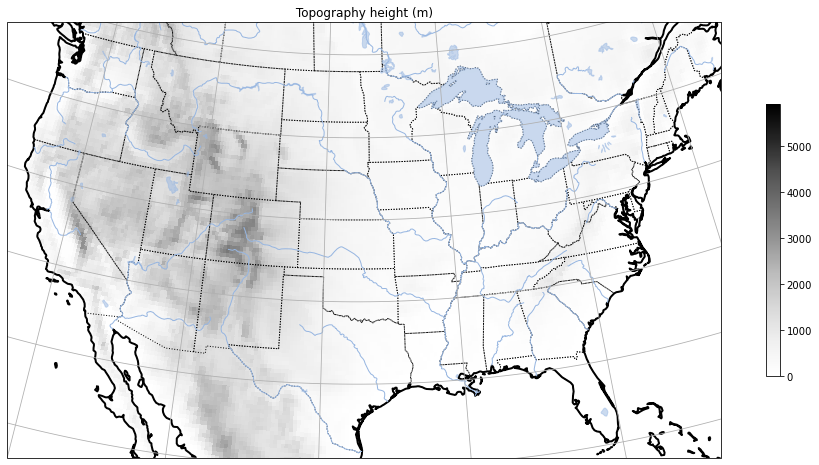

In [13]:
# Let's plot terrain height for the CONUS
# First let's make our basemap
# Refer back to your cartopy.ipynb for a refresher

# create our figure object
fig = plt.figure(figsize=(16, 10))

# select our central latitude and longitude
centlon = -97.5
centlat = 40.

# Select a projection
proj=ccrs.LambertConformal(central_latitude=centlat, central_longitude=centlon)

# create our axis object 'ax', specifying Lambert Conformal projection
ax = fig.add_subplot(1,1,1,projection=proj) 

# The features function we defined adds some cartopy features on.  We pass it 'ax'
features(ax)

# and a nice extent for the CONUS
ax.set_extent([-120,-74,23,50])

#######################################
# now let's add the topo height (hgt0)
#######################################

# we're going to do a color shaded plot -- pcolormesh.  We used this in RADAR.ipynb

# we're going to specify a color map.  This gets a sequence of greys from plt.cm imported in the openers
cmap = plt.cm.Greys

# and let's normalize the plot by specifying min and max values to plot.  This is done with plt.Normalize
norm = plt.Normalize(0, np.max(hgt0.values))

# pcolormesh wants longitude, latitude, the variable to be plotted, as well as
# - the colormap (cmap) we defined as cmap
# - the normalization (norm) we defined as norm
# - the ccrs.PlateCarree() transform since we're supplying lon/lat instead of x/y
# it's saved as an object called 'cm'
# here 'auto' shading will default to 'flat'  Other shading options not available since np.shape(lon) ≠ np.shape(lat)
# more default colormaps: https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html

cm = ax.pcolormesh(lon,lat,hgt0,shading='auto',cmap=cmap, norm=norm, transform=ccrs.PlateCarree())

# add a colorbar.  This takes our 'cm' object, and asks for a certain orientation and size
plt.colorbar(cm, orientation="vertical",shrink=0.5) 

# and add a title
plt.title(" Topography height (m) ")

Text(0.5, 1.0, ' 2m temperature (K)')

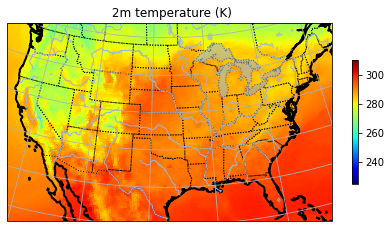

In [34]:
# Let's start over and make a brand new map, but instead
# - plot radar reflectivity variable refl
# - Use the reflectivity colormap NWSReflectivity and normalization we used in RADAR.ipynb
# You can copy the contents of the previous cell and modify as needed

########### YOUR CODE BELOW ###########

fig = plt.figure(figsize=(16,10))

lon_0 = -97.5
lat_0 = 40.

proj=ccrs.LambertConformal(central_latitude=lat_0, central_longitude=lon_0)

ax = fig.add_subplot(2,2,1,projection=proj)

features(ax)
ax.set_extent([-120,-74,23,50])
cm = ax.pcolormesh(lon,lat,t2m,shading='auto',cmap=plt.cm.jet, transform=ccrs.PlateCarree())
plt.colorbar(cm, orientation="vertical",shrink=0.5) 
plt.title(" 2m temperature (K)")

########### YOUR CODE ABOVE ###########


Text(0.5, 1.0, ' Radar Reflectivity (dbz) ')

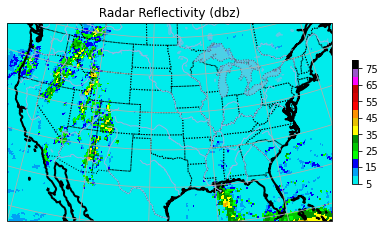

In [35]:
# Let's start over and make a brand new map, but now
# - plot SLP as both a color-shaded map with a contour map superimposed
# - for the pcolormesh colormap, select plt.cm.jet
# - for the pcolormesh normalization, select norm = plt.Normalize(np.min(slp.values), np.max(slp.values))
# - Specify contour levels and spacing for the contour map: we contour SLP every 4 mb and INCLUDE 1000 mb
# -  I created a variable called 'levels' with np.arange(start,end,interval) -- remember, is the end level included?
# - ax.contour(lon,lat,slp,levels=levels,colors='k',transform=ccrs.PlateCarree()) # contour levels saved as levels
# You can copy the contents of the previous cell and modify as needed


########### YOUR CODE BELOW ###########
fig = plt.figure(figsize=(16,10))

lon_0 = -97.5
lat_0 = 40.

proj=ccrs.LambertConformal(central_latitude=lat_0, central_longitude=lon_0)
ax = fig.add_subplot(2,2,2,projection=proj)

features(ax)
ax.set_extent([-120,-74,23,50])

########### YOUR CODE BELOW ###########

ref_norm, ref_cmap = mpplots.ctables.registry.get_with_steps('NWSReflectivity', 5, 5)

cm = ax.pcolormesh(lon,lat,refl,shading='auto',cmap=ref_cmap, norm=ref_norm, transform=ccrs.PlateCarree())

plt.colorbar(cm,orientation="vertical",shrink=0.5)

plt.title(" Radar Reflectivity (dbz) ")
########### YOUR CODE ABOVE ###########

Text(0.5, 1.0, 'Sea-Level Pressure (mb) ')

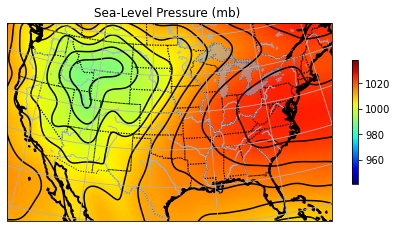

In [36]:
# Let's start over yet again and make a brand new map, but now
# - plot 10m wind speed (wspd10m) as a color-shaded map using plt.cm.jet
# - and superimpose wind barbs colored black
# We first saw barbs in HELLHOLE.ipynb and wind barbs are plotted using
# plt.barbs(x,y,u,v,color='black',transform=ccrs.PlateCarree())
# where here x = lon, y = lat, u = u10m and v = v10m.  BUT:
# (a) It won't plot correctly unless you specify the .values for the wind components
# (b) You will end up with WAY too many wind barbs, so we need to prune them
# In your HELLHOLE script, we learned to prune wind barbs using [::q] notation, where q = specified integer stride
#  and the notation stands for [start : end : stride]
# - you need to do that 'slicing' on EACH dimension.  So, if a variable 'ZZ' is 2D, do ZZ[::q,::q]

# You can copy the contents of the previous cell and modify as needed


########### YOUR CODE BELOW ###########
fig = plt.figure(figsize=(16,10))

lon_0 = -97.5
lat_0 = 40.

proj=ccrs.LambertConformal(central_latitude=lat_0, central_longitude=lon_0)

ax = fig.add_subplot(2,2,3,projection=proj)

features(ax)

ax.set_extent([-120,-74,23,50])

norm = plt.Normalize(np.min(slp.values),np.max(slp.values))

cm = ax.pcolormesh(lon,lat,slp,shading='auto',cmap=plt.cm.jet, norm=norm, transform=ccrs.PlateCarree())

plt.colorbar(cm,orientation="vertical",shrink=0.5)

levels=np.arange(972.,1032.,4.)

cs = ax.contour(lon,lat,slp,levels=levels,colors='k',transform=ccrs.PlateCarree())

plt.title("Sea-Level Pressure (mb) ")

########### YOUR CODE ABOVE ###########

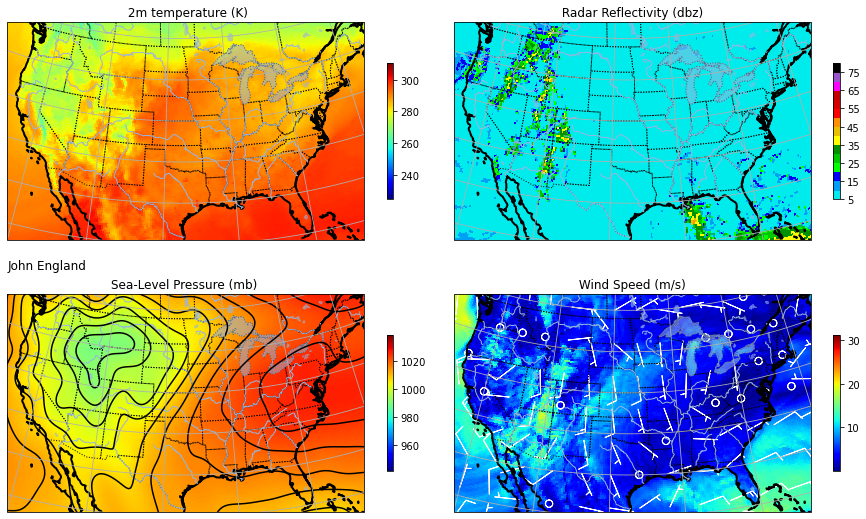

In [42]:
# Figure Size of all Plots
fig = plt.figure(figsize=(16, 10))
   
# Location of all Plots 
centlon = -97.5  
centlat = 40.
proj=ccrs.LambertConformal(central_latitude=centlat, central_longitude=centlon)

# Upper Left Plot (2m Temperature (K))
ax = fig.add_subplot(2,2,1,projection=proj)
features(ax)
ax.set_extent([-120,-74,23,50])
cm = ax.pcolormesh(lon,lat,t2m,shading='auto',cmap=plt.cm.jet, transform=ccrs.PlateCarree())
plt.colorbar(cm, orientation="vertical",shrink=0.5) 
plt.title(" 2m temperature (K)")

# Upper Right Plot (Radar Reflectivity (dbz))
ax = fig.add_subplot(2,2,2,projection=proj)
features(ax)
ax.set_extent([-120,-74,23,50])
ref_norm, ref_cmap = mpplots.ctables.registry.get_with_steps('NWSReflectivity', 5, 5)
cm = ax.pcolormesh(lon,lat,refl,shading='auto',cmap=ref_cmap, norm=ref_norm, transform=ccrs.PlateCarree())
plt.colorbar(cm,orientation="vertical",shrink=0.5)
plt.title(" Radar Reflectivity (dbz) ")

# Lower Left Plot (Sea-Level Pressure)
ax = fig.add_subplot(2,2,3,projection=proj)
features(ax)
ax.set_extent([-120,-74,23,50])
norm = plt.Normalize(np.min(slp.values),np.max(slp.values))
cm = ax.pcolormesh(lon,lat,slp,shading='auto',cmap=plt.cm.jet, norm=norm, transform=ccrs.PlateCarree())
plt.colorbar(cm,orientation="vertical",shrink=0.5)
levels=np.arange(972.,1032.,4.)
cs = ax.contour(lon,lat,slp,levels=levels,colors='k',transform=ccrs.PlateCarree())
plt.title("Sea-Level Pressure (mb) ")

# Lower Right Plot (Wind Speed (m/s))
ax = fig.add_subplot(2,2,4,projection=proj)
features(ax)
ax.set_extent([-120,-74,23,50])
norm = plt.Normalize(np.min(slp.values),np.max(slp.values))
cm = ax.pcolormesh(lon,lat,wspd10m,shading='auto',cmap=plt.cm.jet, transform=ccrs.PlateCarree())
plt.colorbar(cm,orientation="vertical",shrink=0.5)
q=16
plt.barbs(lon[::q],lat[::q],u10m[::q,::q].values,v10m[::q,::q].values,color='white',transform=ccrs.PlateCarree())
plt.title(" Wind Speed (m/s) ")
 
# Plot Spacing and Labeling
plt.subplots_adjust(hspace=0.0)
plt.subplots_adjust(wspace=0.0)
plt.figtext(0.125,0.5,'John England',size=12)
plt.savefig("GFS_4panel.png", bbox_inches = 'tight')